<a href="https://colab.research.google.com/github/theyashmishra/Student-Evaluation-task/blob/main/Student_task_submission(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Evaluation Task: ML4SCI**

Project:Thermonuclear Supernova Classification via their Nuclear Signatures.

*Step 1: Extract Relations between observable parameters(Optical thickness, uncertainity(Optical Thickness), maximum velocity,Uncertainity(maximum velocity,flux)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/theyashmishra/Student-Evaluation-task/main/GSOC_Data_DataCube%20(1).csv')

In [3]:
data.columns

Index(['optical thickness', 'Uncertainity(optical thickness)',
       'maximum velocity', 'Uncertainity(maximum velocity)', 'flux',
       'total mass', 'mass of Ni', 'explosion energy',
       'mass distribution flag', 'radial distribution flag'],
      dtype='object')

In [4]:
data.head()

,optical thickness,Uncertainity(optical thickness),maximum velocity,Uncertainity(maximum velocity),flux,total mass,mass of Ni,explosion energy,mass distribution flag,radial distribution flag
0,1.940628,0.179354,0.013531,0.000670,0.000003,0.75,0.15,0.75,hed8,hed8
1,2.071999,0.210287,0.012423,0.000615,0.000003,0.75,0.15,0.75,hed8,mwd
2,2.007982,0.198804,0.012744,0.000685,0.000003,0.75,0.15,0.75,hed8,N100
3,1.661535,0.189436,0.009935,0.000349,0.000003,0.75,0.15,0.75,hed8,w7dt
4,1.907672,0.178607,0.013343,0.000745,0.000003,0.75,0.15,2.00,hed8,hed8


In [5]:
matrix = data[['optical thickness','maximum velocity','flux']].corr()
matrix

,optical thickness,maximum velocity,flux
optical thickness,1.000000,0.139121,0.632315
maximum velocity,0.139121,1.000000,-0.256090
flux,0.632315,-0.256090,1.000000


In [6]:
import seaborn as sns

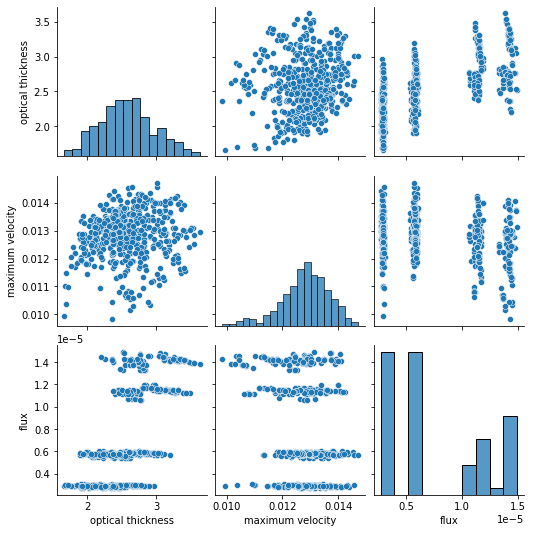

In [7]:
sns.pairplot(data[['optical thickness','maximum velocity','flux']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


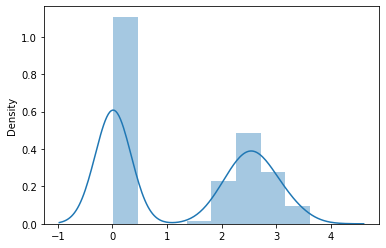

In [8]:
sns.distplot(data[['optical thickness','maximum velocity']])

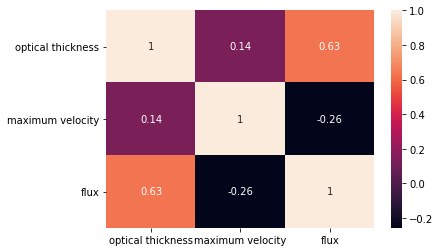

In [9]:
sns.heatmap(data[['optical thickness','maximum velocity','flux']].corr(),annot=True)

Here with the help of visualizations and correlations we can conclude that our observational parameters are related to each other-
1. maximum velocity of ejecta and flux are directly propotional to optical thickness.
2. flux is inversely proportional to maximum velocity of ejecta.

*Step 2:Physical Parameters and there relations*

In [10]:
mat=data.drop(['Uncertainity(optical thickness)','Uncertainity(maximum velocity)'],axis=1).corr()
mat

,optical thickness,maximum velocity,flux,total mass,mass of Ni,explosion energy
optical thickness,1.000000,0.139121,0.632315,0.663398,6.267326e-01,-3.325508e-02
maximum velocity,0.139121,1.000000,-0.256090,0.101983,-2.611050e-01,-7.433199e-03
flux,0.632315,-0.256090,1.000000,0.356623,9.988148e-01,1.587351e-03
total mass,0.663398,0.101983,0.356623,1.000000,3.617858e-01,0.000000e+00
mass of Ni,0.626733,-0.261105,0.998815,0.361786,1.000000e+00,7.529056e-19
explosion energy,-0.033255,-0.007433,0.001587,0.000000,7.529056e-19,1.000000e+00


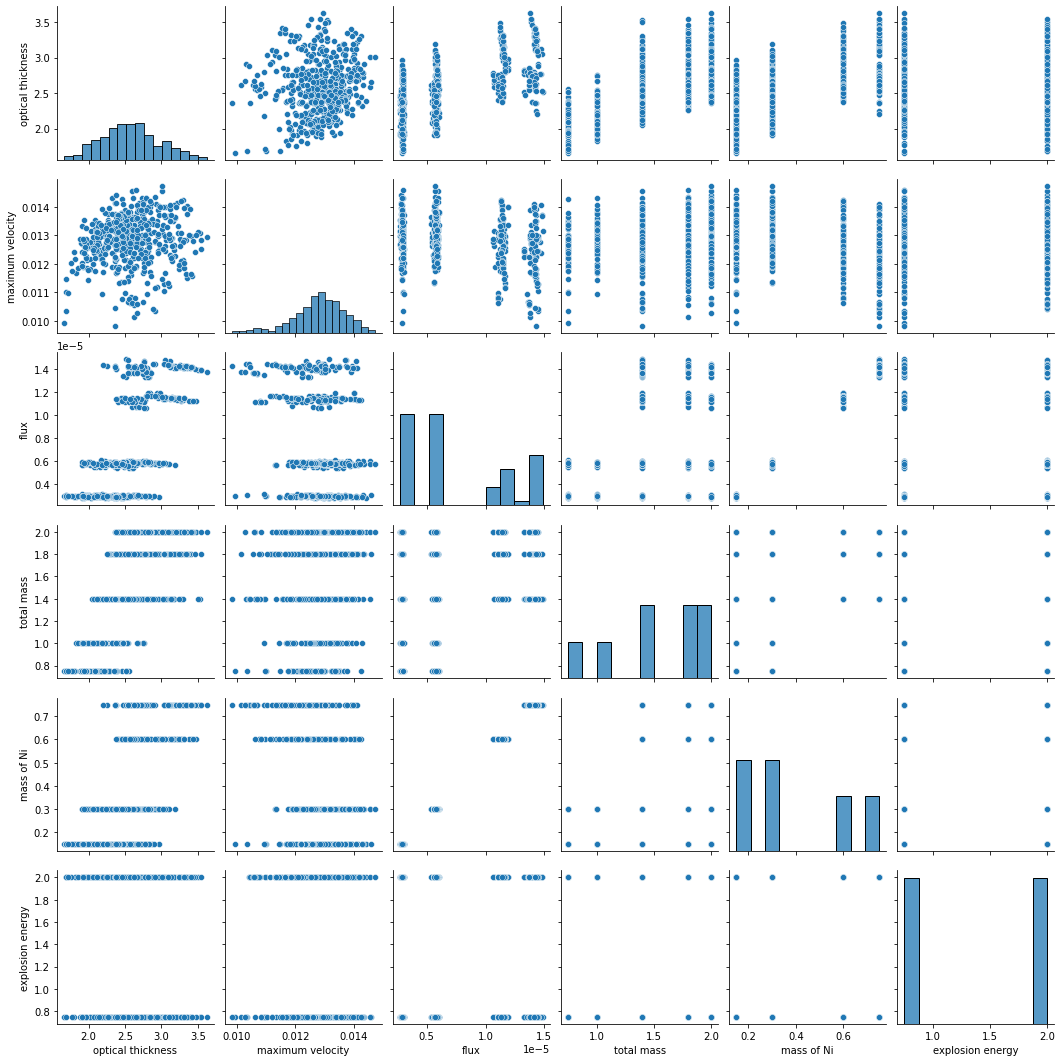

In [11]:
sns.pairplot(data.drop(['Uncertainity(optical thickness)','Uncertainity(maximum velocity)'],axis=1))

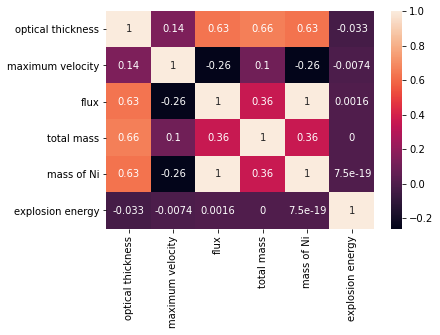

In [12]:
sns.heatmap(data.drop(['Uncertainity(optical thickness)','Uncertainity(maximum velocity)'],axis=1).corr(),annot=True)

Here with the help of visualizations and correlations we can conclude that our physical parameters are related to each other-
1.  **optical thickness** is positively correlated with total mass ,mass of nickel  (directly propotional)and negatively correlated with explosion energy(inversly propotional).
2.  **maximum velocity** is positively correlated with total mass ,mass of nickel  (directly propotional)and negatively correlated with explosion energy(inversly propotional).
3. **flux** is positively correlated with total mass  (directly propotional)and negatively correlated with explosion energy(inversly propotional) and it completely depends on mass of Ni(nickel).
4. **mass of Ni(nickel)** is positively correlated with total mass,optical thickness,flux,explosion energy and total mass  (directly propotional)and negatively correlated with maximum velocity(inversly propotional).
5. **total mass** is positively correlated with maximum velocity,optical thickness,flux and total mass  (directly propotional) and it is independent of explosion energy as correlation between them is zero.
6. **explosion energy** is positively correlated with ,flux and mass of Ni  (directly propotional)and negatively correlated with total mass,optical thickness(inversly propotional).

In [13]:
ni=pd.get_dummies(data['radial distribution flag'],drop_first=True)
ni.head()

,hed8,mwd,w7dt
0,1,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,1,0,0


*Step 3:- Classification of physical parameters with the help of observed parameters*

*Note:-Here, before data modelling i used standard scaler algorithm to preprocess the dataset(observable parameter) and i also used LabelEncoder algorithm as the no. of classes is contionus and more than two for every dependent parameter(physical parameters). I have made five different classification models to classify data into categories.*

1.Classifying **Total mass** with the help of **Random forest classifier** as it gives the maximum accuracy and maximum f1 score ,after trying all the models I realise only random forest classifier is giving the fair results and also i verify my model using classification report to check precison etc and i used log-loss to check diffrence in accuracies by predicting on training data and test data seprately and i got positive results so i used random forest classifier.

In [62]:
X=data[['optical thickness','maximum velocity','flux']]
y=data['total mass']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,criterion='gini')
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
rfc.score(X_test,y_test)
from sklearn.metrics import classification_report
cm=classification_report(y_test,pred)
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        37
           1       0.87      0.79      0.82        42
           2       0.69      0.62      0.65        39
           3       0.66      0.81      0.73        36

    accuracy                           0.72       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.73      0.72      0.72       154



2.Classifying **Mass of Ni(Nickel)** with the help of **Logistic regression classifier(one vs all)** as it gives the maximum accuracy and model score.i used SVM classifier and got much higher accuracy but that model overfits the data that's why i choose multinomial logistic regression and it gives accurate results with no overfitting.

In [67]:
X=data[['optical thickness','maximum velocity','flux']]
y=data['mass of Ni']
le2=LabelEncoder()
y=le2.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,multi_class='ovr')
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='macro')
print(accuracy,f1)
cm=classification_report(y_test,pred)
print(cm)

0.9675324675324676 0.9666022855303396
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.91      1.00      0.95        52
           2       1.00      0.84      0.91        31
           3       1.00      1.00      1.00        32

    accuracy                           0.97       154
   macro avg       0.98      0.96      0.97       154
weighted avg       0.97      0.97      0.97       154



3.Classifying **explosion energy** with the help of    **Random forest  classifier** as it gives the maximum accuracy although accuracy is still poor due to imbalance dataset but the model fits well .I also applied lgbm and xgboost algorithms but they underfits the data and gives unwanted results whereas random forest classifier when used it gives favourable results and classification report confirms that my model holds good in this case.

In [79]:
X=data[['optical thickness','maximum velocity','flux']]
y=data['explosion energy']
le3=LabelEncoder()
y=le3.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [81]:
rfc_ee=RandomForestClassifier(n_estimators=1000,criterion='gini')
rfc_ee.fit(X_train,y_train)
pred=rfc_ee.predict(X_test)
rfc_ee.score(X_test,y_test)
from sklearn.metrics import accuracy_score,f1_score
m=classification_report(y_test,pred)
print(cm)

              precision    recall  f1-score   support

           0       0.30      0.32      0.31        69
           1       0.42      0.40      0.41        85

    accuracy                           0.36       154
   macro avg       0.36      0.36      0.36       154
weighted avg       0.37      0.36      0.36       154



4.Classifying **mass distribution flag** with the help of **lightbgm(LGBM) classifier** as it gives the maximum accurate results and fits the model well among rest of the classifier models,here log-loss algorithm confirms no overfitting , model score and classification report shows us that our results is great.

In [71]:
X=data[['optical thickness','maximum velocity','flux']]
y=data['mass distribution flag']
le1=LabelEncoder()
y=le1.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [72]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
lg = lgb.LGBMClassifier()    
lg.fit(X_train,y_train)
pred = lg.predict(X_test)
cm=classification_report(y_test,pred)
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        36
           1       0.69      0.65      0.67        37
           2       0.65      0.65      0.65        40
           3       0.68      0.68      0.68        41

    accuracy                           0.68       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.68      0.68      0.68       154



5.Classifying **radial mass flag** with the help of **Xgboost classifier** as it gives the maximum accuracy and rest of the models fails to give favourable results with higher precision and most of them even overfits the model.

In [73]:
X=data[['optical thickness','maximum velocity','flux']]
y=data['radial distribution flag']
le1=LabelEncoder()
y=le1.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
pred = xg.predict(X_test)
cm=classification_report(y_test,pred)
print(cm)

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        37
           1       0.80      0.76      0.78        42
           2       0.73      0.69      0.71        39
           3       0.69      0.86      0.77        36

    accuracy                           0.74       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.74      0.74      0.74       154



*4.Test:-prediction on test samples*
1. Test Case 1:
 𝜏 = 3.35
  𝜈Max = 0.015
  Φ300 = 1.20×10-5

2. Test Case 2:
 𝜏 = 2.54
  𝜈Max = 0.013
  Φ300 = 5.02×10-6

3. Test Case 3:
 𝜏 = 2.46
  𝜈Max = 0.013
  Φ300 = 1.03×10-5


In order to test the routine on the test cases.I created a dataframe of all the given test cases, predicted there values and then transform invertly and then make a dataframe of all the predicted physical parameters seprately.

In [82]:
dict={'optimal thickness':[3.350000,2.540000,2.460000],
      'maximum velocity':[0.015,0.013,0.013],
      'flux':[0.000012,0.00000502,0.0000102]}
df=pd.DataFrame(dict)
df =sc_x.fit_transform(df)
dict={ 'total mass':rfc.predict(df), 'mass of Ni':lr.predict(df), 'explosion energy':rfc_ee.predict(df),
       'mass distribution flag':lg.predict(df), 'radial distribution flag':xg.predict(df)}     

In [83]:
result=pd.DataFrame(dict)
result['total mass']=le.inverse_transform(result['total mass'])
result['mass of Ni']=le2.inverse_transform(result['mass of Ni'])

result['explosion energy']=le3.inverse_transform(result['explosion energy'])
result['mass distribution flag']=le1.inverse_transform(result['mass distribution flag'])
result['radial distribution flag']=le1.inverse_transform(result['radial distribution flag'])
result

,total mass,mass of Ni,explosion energy,mass distribution flag,radial distribution flag
0,1.4,0.60,2.00,N100,mwd
1,1.0,0.15,0.75,w7dt,hed8
2,1.8,0.30,2.00,hed8,w7dt
